In [1]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

# Getting old Tweets

In [2]:
tweets = pd.read_csv("../data/raw/output_got.csv")

In [3]:
tweets.head()

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,2019-05-20 23:59:58,tpurvis06,NaN,0,0,0,You’ll never love #GameOfThrones as much as I ...,NaN,NaN,#GameOfThrones,1130624236232499200,https://twitter.com/tpurvis06/status/113062423...
1,2019-05-20 23:59:58,KrystalBClear7,NaN,0,0,0,They did Queen Dany dirtyyyyyyyy! #GameOfThrones,NaN,NaN,#GameOfThrones,1130624235347615746,https://twitter.com/KrystalBClear7/status/1130...
2,2019-05-20 23:59:57,Dynastiix,NaN,0,0,0,Bran is probably feeling really insecure about...,NaN,NaN,#GameOfThrones #GOTFinale,1130624232533254144,https://twitter.com/Dynastiix/status/113062423...
3,2019-05-20 23:59:56,alisonmccourt,NaN,0,0,4,I wouldn’t trade the 8 years of watch parties....,NaN,NaN,#GameOfThronesFinale #GameOfThrones,1130624226178850817,https://twitter.com/alisonmccourt/status/11306...
4,2019-05-20 23:59:55,sponzillotv,NaN,0,0,0,"#OverheardWhileDogWalking “Because, like, the ...",NaN,NaN,#OverheardWhileDogWalking #SheWasntWrong #Game...,1130624224819859457,https://twitter.com/sponzillotv/status/1130624...


In [4]:
things = ['text', 'date', 'retweets', 'geo', 'favorites', 'hashtags']

In [5]:
tweets = tweets[things]

In [6]:
tweets.shape

(20000, 6)

# Cleaning the feed

In [7]:
# drop duplicates posted seconds/minutes/hours away from each other
tweets = tweets.drop_duplicates([x for x in tweets.columns if x is not 'date'])

In [8]:
tweets.shape

(19983, 6)

In [9]:
# sum favorites & retweets
grouped_text = tweets.groupby("text").sum().reset_index()

In [10]:
# earliest date of post
grouped_date = tweets.groupby("text").date.min().reset_index()

In [11]:
ftweets = grouped_date.merge(grouped_text, on="text", how="left")

In [12]:
ftweets.shape

(19876, 5)

In [13]:
def saveAsCoord(x):
    try:
        return tuple(x['coordinates'])
    except:
        return 'NA'

In [21]:
ftweets['geo_cor'] = ftweets.geo.apply(saveAsCoord)

In [22]:
ftweets[ftweets.geo_cor != 'NA']

,text,date,retweets,geo,favorites,geo_cor


In [23]:
ftweets.isnull().sum()

text         0
date         0
retweets     0
geo          0
favorites    0
geo_cor      0
dtype: int64

- **only keep one for same content, different links**

In [17]:
def replaceLinks(x):
    while re.search("[pic]*?.twitter.com/[a-z\d]*", x.lower()) is not None:
        temp = re.search("[pic]*?.twitter.com/[a-z\d]*", x.lower())
        x = x.replace(x[temp.start(): temp.end()], "")
    return x

In [24]:
ftweets["no_links"] = ftweets.text.apply(replaceLinks)

In [25]:
ftweets.drop_duplicates([x for x in ftweets.columns if x not in ['text', 'date']], inplace=True)

In [277]:
test = ftweets.groupby("no_links").min().reset_index()

## - Most Retweeted

In [279]:
for t in test.sort_values("retweets", ascending = False).head(5).text:
    print(t, "\n")

This video wins the internet today! #GameOfThrones pic.twitter.com/JCNfjpeq5E 

I'm not crying, you are. #GameOfThrones pic.twitter.com/FT9zqYOkEp 

An extraordinary journey. @Isaac_H_Wright #GameofThrones pic.twitter.com/mhV3pLUTDL 

Nothing sums up the snowflake generation more than this ridiculous petition to have the #GameofThrones final season rewritten. If they don't get what they want, whether it's Trump, Brexit or a TV show, they lie on the floor screaming 'I REFUSE TO ACCEPT THAT - DO IT AGAIN!!!!!' 

Mom... Mom... get up mom... #GameOfThrones #gotatlanticpic.twitter.com/ympeyepzyl 



> The 5th most retweeted tweet is about Dany but did not mention her name at all. (You can got to this page for the content pic.twitter.com/ympeyepzyl).

> There will be these tweets that we might not be able to capture.

## - Most Favorited

In [280]:
for t in test.sort_values("favorites", ascending = False).head(5).text:
    print(t, "\n")

An extraordinary journey. @Isaac_H_Wright #GameofThrones pic.twitter.com/mhV3pLUTDL 

This video wins the internet today! #GameOfThrones pic.twitter.com/JCNfjpeq5E 

Nothing sums up the snowflake generation more than this ridiculous petition to have the #GameofThrones final season rewritten. If they don't get what they want, whether it's Trump, Brexit or a TV show, they lie on the floor screaming 'I REFUSE TO ACCEPT THAT - DO IT AGAIN!!!!!' 

I'm not crying, you are. #GameOfThrones pic.twitter.com/FT9zqYOkEp 

THANK YOU !!!!! #gameofthrones #aryastarksequel #bestcastandcrew https://www.instagram.com/p/BxswpkslPpW/?igshid=b2ymoar0eer … 



> The most favorited tweet is about the actor who played Bran but did not mention the character's name. 

> There will be these tweets that we might not be able to capture.

## - Most Recent Tweets

In [281]:
for t in test.sort_values("date", ascending = False).head(5).text:
    print(t, "\n")

You’ll never love #GameOfThrones as much as I don’t... 

They did Queen Dany dirtyyyyyyyy! #GameOfThrones 

Bran is probably feeling really insecure about his manhood now because of Sansa's comment. His third eye dosent work. #GameOfThrones #GOTFinale 

I wouldn’t trade the 8 years of watch parties. I really wouldn’t. #GameOfThronesFinale #GameOfThrones 

#OverheardWhileDogWalking “Because, like, the Robin Arryn glowup is only because his mom died and like he could finally get vaccinated” Done. I’m just done. #SheWasntWrong #GameOfThrones 



## - Combine retweets & favorites since they are quite correlated

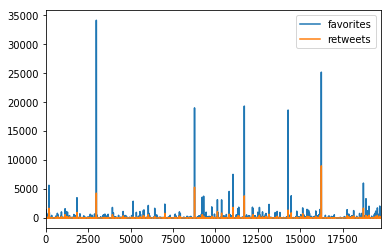

In [30]:
test[['favorites', 'retweets']].plot()

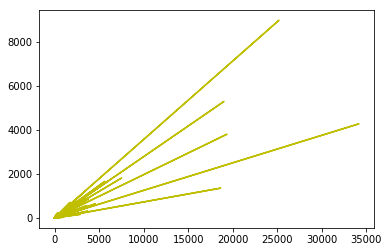

In [31]:
plt.plot(test.favorites, test.retweets, "y")

In [32]:
test[['favorites', 'retweets']].corr()

,favorites,retweets
favorites,1.000000,0.895553
retweets,0.895553,1.000000


In [282]:
test['popularity'] = test.favorites + test.retweets

## - Mentioning main characters

In [34]:
mains = ["|".join(['daenerys targaryen', "dany", "daenerys", "khaleesi", "mother of dragons", "motherofdragons", 
                   "danerys", "danaerys"]), 
         "|".join(['jon snow', 'jon']), 
         "|".join(['sansa Stark', 'sansa']), 
         "|".join(['arya Stark', 'arya']),
         "|".join(["bran Stark", "brandon Stark", "three-eyed raven", "bran"]),
         "|".join(['tyrion', 'tyrion lannister'])]

In [35]:
for char in mains:
    print(char[0],test[test.no_links.str.lower().str.contains(char)].shape[0])

d 1331
j 1589
s 624
a 756
b 1447
t 643


> Most people mentioned Jon, followed by Bran and then Dany.

### A glimpse of their most popular tweets

In [283]:
for x in test[test.no_links.str.lower().str.contains(mains[0])].sort_values("popularity", ascending=False).head(5).text:
    print(x, "\n")

Jon to Dany there at the end #GameOfThonesFinale #GameOfThrones #DemThronespic.twitter.com/n0czgoAvkz 

In S5 E2 Ser Barristan Selmy councils Daenerys to utilize restraint and warns her about following in her father’s footsteps #GameofThrones pic.twitter.com/utUm0TCiq3 

I’m just really hoping this is what’s going on in Dany’s afterlife after that mess of betrayal and loss she went through #GameOfThrones pic.twitter.com/YbQdofNUhJ 

Great CGI work! #Daenerys #Drogon #GameOfThrones pic.twitter.com/JaxPlk3a7r 

For what’s (hopefully!) my last #GameofThrones piece, I wrote about why Dany’s story ending on the “Jon & Tyrion Talk In Circles” show was so frustrating, and how hard Emilia Clarke crushed it, anyway. https://variety.com/2019/tv/columns/game-of-thrones-series-finale-dany-daenerys-death-mad-queen-1203221341/ … 



In [284]:
for x in test[test.no_links.str.lower().str.contains(mains[1])].sort_values("popularity", ascending=False).head(5).text:
    print(x, "\n")

Jon to Dany there at the end #GameOfThonesFinale #GameOfThrones #DemThronespic.twitter.com/n0czgoAvkz 

#GameofThrones >yara greyjoy won the kingsmoot but is anti democracy and fought for independence >prince of dorne has no idea wtf a 3 eyed raven is >gendry literal heir to the throne >jon snow also literally the heir to the throne tyrion: lets vote for bran lords of westeros: pic.twitter.com/IsKXS62kUy 

For what’s (hopefully!) my last #GameofThrones piece, I wrote about why Dany’s story ending on the “Jon & Tyrion Talk In Circles” show was so frustrating, and how hard Emilia Clarke crushed it, anyway. https://variety.com/2019/tv/columns/game-of-thrones-series-finale-dany-daenerys-death-mad-queen-1203221341/ … 

#GameOfThrones questions... • Where did Drogon go? • How did all those rocks not severely damage Jaime & Cersei’s heads? • Who the hell is Jon going to watch for at The Wall? • Why does Bran need a master of whisperers? pic.twitter.com/8MrXh2tDMK 

So what's the point of brin

## - Try seperating Spanish into its own
using #juegodetronos

In [285]:
spanish = test[test.text.str.contains("#juegodetronos")]

In [286]:
test = test[~test.text.str.contains("#juegodetronos")].reset_index(drop=True)

## - Hashtags Analysis

In [40]:
from functools import reduce

In [41]:
def findHashtags(x):
    new = re.findall("#[a-z]*", x.lower())
    return new

In [42]:
new = test.text.apply(findHashtags)

In [43]:
all_words = []

In [44]:
all_words = reduce(lambda x, y: x+y, new.values.tolist())

In [45]:
hashtags = list(set(all_words))

In [46]:
check = sorted(hashtags, key=len, reverse=True)

In [47]:
hash_counts = [(k,v) for k,v in Counter(all_words).items()]

In [48]:
sorted_x = sorted(dict(hash_counts).items(), key=lambda kv: kv[1])

In [49]:
sorted_x[-10:]

[('#thefinalepisode', 261),
 ('#gotseasonfinale', 261),
 ('#jonsnow', 336),
 ('#gots', 342),
 ('#gameofthronesfinalepic', 344),
 ('#gotfinale', 713),
 ('#gameofthonesfinale', 1147),
 ('#gameofthronesfinale', 1807),
 ('#got', 2301),
 ('#gameofthrones', 19792)]

### -> Most used hashtags

Text(0.5, 1.0, 'Number of Mentions for the Top 10 Hashtags')

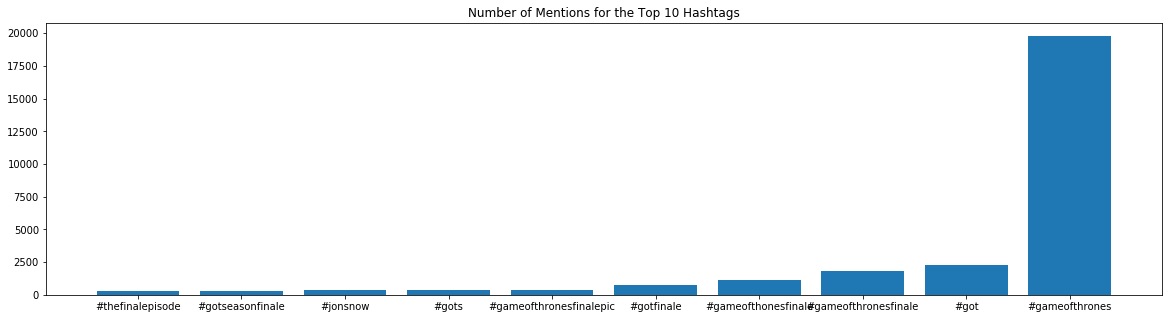

In [50]:
plt.figure(figsize=(20,5))
plt.bar([x[0] for x in sorted_x[-10:]], [x[1] for x in sorted_x[-10:]])
plt.title("Number of Mentions for the Top 10 Hashtags")

> A lot of (about 1K) people are struggling with spelling. #gameofthones

## - Topic Analysis

In [51]:
import re, string
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from nltk.stem.porter import PorterStemmer

In [52]:
# Create a WordNetLemmatizer object
lemmatizer = WordNetLemmatizer()

In [233]:
# Use Porter stemmer
stemmer = PorterStemmer()

In [53]:
# create English stop words list (you can always define your own stopwords)
stop_words = set(stopwords.words('english'))

In [201]:
# Function to remove stop words from sentences & lemmatize verbs and nouns. 
def clean(doc, lem = True):
    # treat xx's as xxs
    doc = doc.replace("'s", "s")
    # tokenize
    tokenized = word_tokenize(doc.lower())
    # remove punctuations (’ included) and stopwords
    stop_free = [x for x in tokenized if not re.fullmatch('[' + string.punctuation + '’]+', x) and x not in stop_words]
    if lem:
        lemma_verb = [lemmatizer.lemmatize(word,'v') for word in stop_free]
        lemma_noun = [lemmatizer.lemmatize(word,'n') for word in lemma_verb]
        #y = [s for s in lemma_noun if len(s) > 2]
        return lemma_noun
    else:
        return stop_free

**Step 1: Clean the corpus**
- convert the text reviews to lowercase
- remove #gameofthrones (every tweet has it)
- remove reviews with less than 3 tokens

In [55]:
def removeHashtags(x):
    for i in range(len(check)-1):
        hashed = check[i]
        try:
            x = x.lower().replace(hashed, "")
        except:
            next
    return x

In [56]:
links = re.compile('[https?]*?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+[/?\w+=?\w+]*')
def removeLinks(x):
    while re.search(links, x.lower()) is not None:
        temp = re.search(links, x.lower())
        x = x.replace(x[temp.start(): temp.end()], "")
    return x

In [291]:
# clean text one step at a time
test['pure_text'] = test.text.apply(removeHashtags)
test['pure_text'] = test.pure_text.apply(replaceLinks)
test['pure_text'] = test.pure_text.apply(removeLinks)

In [62]:
review = test.pure_text.values.tolist()

In [63]:
long_review = [x for x in review if len(x) > 3]

In [64]:
len(review), len(long_review)

(19726, 19726)

- tokenize them
- remove punctuations, and stop words.
- filter the terms which occurred less than 10 times in your documents (i.e., reviews).
- with and without lemmatization

In [202]:
# with lemmatization
skim_review = [clean(doc.strip()) for doc in long_review]

**Step 2: Create the dictionary**

only exploring dictionary with Lemmatization

-With lemmatization

In [203]:
freq = [(k,v) for k,v in Counter([item for sublist in skim_review for item in sublist]).items() 
        if v >= 10 and re.search('\d+', k) is None]

dictionary = [x[0] for x in freq]

**Step 3: DT**

Convert the list of documents in your corpus into Document-Term Matrix using the dictionary prepared at Step 2 (again, a term is a word).

-With lemmatization

In [204]:
Dic = corpora.Dictionary([dictionary])
corpus = [Dic.doc2bow(doc_clean) for doc_clean in skim_review]

**Step 4: Run the LDA model on the document-term matrix**
    
LDA with the following parameters: number of topics (k = 10), number of passes (pass = 20), and number of iterations (iterations = 2000).

-With lemmatization

In [205]:
# LDA model needs many iterations/passes and a large corpus to work well
# must define the number of topics you want to extract from the corpus
ldamodel = LdaModel(corpus, num_topics=7, id2word = Dic, passes=20, iterations=2000)

**Step 5: For each of the k topics, print the top 10 words**

In [206]:
ori_tops = ldamodel.print_topics(num_topics=7, num_words=10)

In [207]:
pd.DataFrame([re.findall("\"\w*[.']?\w*\"", x[1]) for x in ori_tops])\
    .rename(index=dict(zip(range(5), ["topic"+str(x) for x in range(5)])),
            columns=dict(zip(range(10), ["word_"+str(x) for x in range(10)])))

,word_0,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9
topic0,"""thank""","""show""","""amaze""","""love""","""one""","""character""","""make""","""perfect""","""u""","""work"""
topic1,"""throne""","""game""","""finale""","""spoiler""","""hbo""","""watch""","""season""","""series""","""fan""",None
topic2,"""jon""","""queen""","""snow""","""dany""","""drogon""","""dragon""","""north""","""daenerys""","""get""","""kill"""
topic3,"""book""","""like""","""people""","""story""","""see""","""two""","""look""","""get""",None,None
topic4,"""end""","""n't""","""watch""","""show""","""season""","""series""","""ever""","""'m""","""episode""","""finale"""
5,"""bran""","""king""","""tyrion""","""arya""","""break""","""westeros""","""na""","""stark""","""new""","""one"""
6,"""season""","""get""","""last""","""episode""","""like""","""end""","""fuck""","""well""","""watch""","""think"""


## - Sentiment Analysis

- train model using Cornell Movie Review Data <html>https://www.cs.cornell.edu/people/pabo/movie-review-data/</html>

In [107]:
import tarfile

In [156]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from nltk import pos_tag, bigrams
import numpy as np

In [129]:
train_pos_file_list = []
train_neg_file_list = []
test_pos_file_list = []
test_neg_file_list = []
with tarfile.open("../data/raw/review_polarity.tar.gz") as f:
    for member in f.getmembers():
        # skip README file
        if member.name == 'poldata.README.2.0':
            next
        else:
            file=f.extractfile(member)
            content=file.read()
            if 'pos' in member.name:
                if int(member.name[19:22]) >= 800:
                    test_pos_file_list.append(content)
                else:
                    train_pos_file_list.append(content)
            else:
                if int(member.name[19:22]) >= 1800:
                    test_neg_file_list.append(content)
                else:
                    train_neg_file_list.append(content)

In [131]:
train_pos_labels = [1 for i in range(len(train_pos_file_list))]
train_neg_labels = [0 for i in range(len(train_neg_file_list))]
test_pos_labels = [1 for i in range(len(test_pos_file_list))]
test_neg_labels = [0 for i in range(len(test_neg_file_list))]

In [132]:
train_labels = train_pos_labels + train_neg_labels
test_labels = test_pos_labels + test_neg_labels

In [148]:
train_pos_file_list = [str(text).replace("b'", "").replace("\\n","").replace("\\'","'") for text in train_pos_file_list]
train_neg_file_list = [str(text).replace("b'", "").replace("\\n","").replace("\\'","'") for text in train_neg_file_list]
test_pos_file_list = [str(text).replace("b'", "").replace("\\n","").replace("\\'","'") for text in test_pos_file_list]
test_neg_file_list = [str(text).replace("b'", "").replace("\\n","").replace("\\'","'") for text in test_neg_file_list]

In [149]:
train_file_list = train_pos_file_list + train_neg_file_list
test_file_list = test_pos_file_list + test_neg_file_list

In [154]:
def clean_review(review, stem=False):
    """Clean a passed in review
    
    Tokenizes and removes punctuation, with the option of stemming
    
    Args:
        review (str): movie review text string
        stem (boolean): indicator whether to stem or just tokenize
        
    Returns:
        clean_review (list): tokenized, cleaned movie review
    """
    # Remove styling
    review = word_tokenize(review)
    if stem:
        stemmer = PorterStemmer()
        review = [stemmer.stem(token) for token in review]
    # Remove punctuation
    cleaned_review = [x for x in review if not re.fullmatch('[' + string.punctuation + ']+', x)]
    return cleaned_review

In [161]:
def show_most_informative_features(vectorizer, classifier, n=10):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()  
    topn_pos_class = sorted(zip(classifier.feature_count_[1], feature_names),reverse=True)[:n]
    topn_neg_class = sorted(zip(classifier.feature_count_[0], feature_names),reverse=True)[:n]    

    print("Important words in positive reviews")
    for coef, feature in topn_pos_class:
        print(class_labels[1], coef, feature) 
    print("-----------------------------------------")
    print("Important words in negative reviews")
    for coef, feature in topn_neg_class:
        print(class_labels[0], coef, feature)

In [309]:
train = [clean_review(review) for review in train_file_list]
ttest = [clean_review(review) for review in test_file_list]

Multiple methods are entertained, but having adj/v features perform the best / has the highest accuracy:
    1. absent/present words (68.5%)
    2. term frequency (72.5%)
    3. POS tagging (adj/v) (73.5%)
    4. tf-idf (51%)
    5. bi-grams (67%)

- M2: term frequency

In [310]:
vectorizer = CountVectorizer()
train_features = vectorizer.fit_transform([' '.join(review) for review in train])
test_features = vectorizer.transform([' '.join(review) for review in ttest])
nb_clf = MultinomialNB()
nb_clf.fit(train_features, train_labels)
predictions = nb_clf.predict(test_features)
accuracy = accuracy_score(test_labels, predictions)
accuracy

0.725

In [311]:
class_labels = nb_clf.classes_
show_most_informative_features(vectorizer, nb_clf)

Important words in positive reviews
1 33040.0 the
1 15818.0 and
1 14844.0 of
1 13119.0 to
1 11428.0 is
1 9282.0 in
1 6761.0 it
1 6517.0 that
1 5193.0 as
1 4753.0 with
-----------------------------------------
Important words in negative reviews
0 35058.0 the
0 15680.0 and
0 15487.0 of
0 15420.0 to
0 11626.0 is
0 10097.0 in
0 7803.0 that
0 7756.0 it
0 4941.0 with
0 4930.0 this


In [167]:
def clean_pos(tokenized, stem=False):
    punctuation_free = [x for x in tokenized if not re.fullmatch('[' + string.punctuation + ']+', x)]
    word_posTags = pos_tag(punctuation_free)
    # get adjv words by the POS tags
    adjv_words = [x[0] for x in word_posTags if len(re.findall('(RB\w*|JJ\w*)', x[1]))>0]
    # presence/absence
    unique_adjv_words = list(set(adjv_words))
    if stem:
        stemmedWords = []
        for word in unique_adjv_words:
            try:
                a = stemmer.stem(word)
                stemmedWords.append(a)
            except:
                next
        return ' '.join(stemmedWords)
    else:
        return ' '.join(unique_adjv_words)

- M3: POS advj

In [312]:
vectorizer = CountVectorizer()
train_features = vectorizer.fit_transform([clean_pos(review) for review in train])
test_features = vectorizer.transform([clean_pos(review) for review in ttest])
nb_clf = MultinomialNB()
nb_clf.fit(train_features, train_labels)
predictions = nb_clf.predict(test_features)
accuracy = accuracy_score(test_labels, predictions)
accuracy

0.735

In [313]:
class_labels = nb_clf.classes_
show_most_informative_features(vectorizer, nb_clf)

Important words in positive reviews
1 700.0 not
1 600.0 more
1 577.0 when
1 564.0 so
1 538.0 well
1 519.0 most
1 511.0 just
1 497.0 even
1 492.0 only
1 487.0 good
-----------------------------------------
Important words in negative reviews
0 854.0 not
0 769.0 so
0 732.0 when
0 719.0 more
0 694.0 only
0 686.0 just
0 674.0 even
0 596.0 good
0 571.0 much
0 534.0 most


- **Use the model on all tweets**

In [316]:
tweet_features = vectorizer.transform([clean_pos(review) for review in review])
t_predictions = nb_clf.predict(tweet_features)

In [324]:
sum(t_predictions)

0

> This model thinks that all GoT tweets are negative.

# - Topic & Sentiment Analysis for each character

## *Topic Analysis*

In [273]:
def removeDany(x, char):
    for name in char.split("|"):
        x = x.replace(name, "")
    x = x.replace("'s", "s")
    return x

In [296]:
def getCharTopics(char, Dic = Dic, n_topics = 5):
    """
    Args:
        char (str): one of the mains
    """
    ## Step 1: clean
    # filter down to the character
    char_tweets = test[test.no_links.str.lower().str.contains(char)]
    # remove the character name (which will show up a lot, thus skewing topics)
    char_review = char_tweets.pure_text.apply(lambda x: removeDany(x, char)).values.tolist()
    # with lemmatization
    d_review = [clean(doc.strip()) for doc in char_review]
    # build new corpus with only the character related tweets
    d_corpus = [Dic.doc2bow(doc_clean) for doc_clean in d_review]
    # create LDA model
    d_ldamodel = LdaModel(d_corpus, num_topics=n_topics, id2word = Dic, passes=20, iterations=2000)
    d_tops = d_ldamodel.print_topics(num_topics=n_topics, num_words=10)
    topics = pd.DataFrame([re.findall("\"\w*[.']?\w*\"", x[1]) for x in d_tops])\
            .rename(index=dict(zip(range(n_topics), ["topic"+str(x) for x in range(n_topics)])),
                    columns=dict(zip(range(10), ["word_"+str(x) for x in range(10)])))
    return char_review, topics

In [297]:
jon_review, jon_topics = getCharTopics(mains[1])
jon_topics

,word_0,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9
topic0,"""say""","""know""","""end""","""love""","""life""","""kill""","""n't""","""one""","""ever""","""live"""
topic1,"""king""","""bran""","""queen""","""n't""","""sansa""","""become""","""dany""","""north""","""know""","""kill"""
topic2,"""throne""","""game""","""dany""","""kill""","""like""","""would""","""know""",None,None,None
topic3,"""end""","""ghost""","""get""","""better""","""finale""","""deserve""","""episode""","""like""","""happy""","""season"""
topic4,"""end""","""go""","""king""","""north""","""watch""","""night""","""targaryen""","""get""","""arya""","""season"""


In [ ]:
dany_review, dany_topics = getCharTopics(mains[1])
dany_topics

In [ ]:
d_review = [clean(doc.strip()) for doc in dany_review]

In [216]:
[(k,v) for k,v in Counter([item for sublist in d_review for item in sublist]).items() 
        if v >= 10][:5]

[('jon', 336), ('end', 265), ('ser', 11), ('council', 13), ('follow', 14)]

## *Sentiment Analysis*

In [299]:
def returnAdj(words):
    words = words.replace("'s", "s")
    words = words.replace("not ", "not_")
    words = word_tokenize(words)
    punctuation_free = [x for x in words if not re.fullmatch('[' + string.punctuation + '’]+', x)]
    #punctuation_free = [lemmatizer.lemmatize(word) for word in punctuation_free]
    word_posTags = pos_tag(punctuation_free)
    adj_words = [x[0] for x in word_posTags if x[1] in ['JJ','JJR','JJS']]
    return adj_words

In [301]:
def getTopAdj(reviews, n = 10, chart = True):
    # only get adjectives
    d_adj = [returnAdj(x) for x in reviews]
    # count occurrences
    d_adj_list = [(k,v) for k,v in Counter(list(reduce(lambda x, y: x+y, d_adj))).items() 
        if v >= 10 and re.search('\d+', k) is None and len(k) > 1]
    # take top n
    ranked = sorted(dict(d_adj_list).items(), key=lambda kv: kv[1], reverse=True)[:n]
    if chart:
        plt.figure(figsize=(10,5))
        plt.bar([x[0] for x in ranked], [x[1] for x in ranked])
        plt.title("Top {} Adjectives in the Tweets".format(n))
        plt.show()
    return ranked

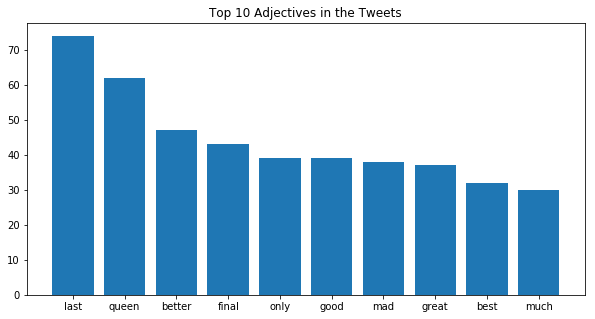

In [270]:
drank = getTopAdj(dany_review)

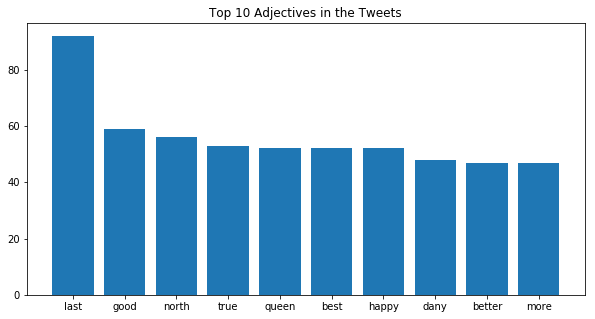

In [302]:
jrank = getTopAdj(jon_review)